In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./letterto shareholders2/*華夏*.txt")
    return files
textfile=textfile()
textfile

['./letterto shareholders2\\2013華夏致股東.txt',
 './letterto shareholders2\\2014華夏致股東.txt',
 './letterto shareholders2\\2015華夏致股東.txt',
 './letterto shareholders2\\2016華夏致股東.txt',
 './letterto shareholders2\\2017華夏致股東.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.016 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['107','2017',':','2018','2035','到','為主','都','面對','／','尤其','企業','影響','機電','原物','產品','主要','同時','加上','柒萬元','同期','逐步','四年','億陸仟','六年','五年','受到','另外','貨幣','進行','三年','單位','汽車','紙業','作業','目前','公司','年度','隨著','各位','方面','台北市','萬元','濕紙','市場','本期','士林','衡量','伍拾','鋼材','馬達','仟元','台幣','拋光','稅後','萬元','馬達','107','2017',':','2018','2035','電廠','出租','內容','延伸','推出','分別','五年','行情','品牌','使用','突破','媒體','取得','兩岸','美元','生活','今年','元月','逐漸','領域','內容','成果','月份','推出','費用','取得','資訊','原料','一年','包含','春節','每桶','巴西','情資','用戶','前年','全力','建立','認證','流量','會員','去年','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','商城','吳玉堂','中國國','半導體','官學','雲端','抗菌','美洲','病毒','卡亦持續','億柒仟','不動產處','機構','內政部','冰箱','智能化','半導體','公寓','飲品','旅館','韓國','以上','街上','文青','浪潮','故事','服務據點','椰子','機械','太陽能','美術','都市','創意','失業率','市府','安全','審議','土地','位廣告','仟元','年產','減排','智能','能效','自動化','工程','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','以上','太陽能','美術','位廣告','仟元','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['壹 致股 東報 告書 諸位 股東 女士 感謝 股東長 期 對 本 支持 謹將營 運狀況 報告 如下 一 一 二 營業 報告 本 一 合 併 銷貨淨額 新 四十一 億九仟 去年同期 增加 二仟 預算達 成率 合 併 營業 利益 新台 幣九億一仟 去年同期 減少七仟 八佰萬元 合 併 稅後淨 利為 新 八億一仟 去年同期 減少 一 億三仟 預算達 成率 合 併 稅後淨 利歸屬 於 本 業主為 新 七 億五仟 減少 八仟 回顧 一 營運 在 乙烯基 系列 年初 受區 域性 供 需失調 之 亞太地區 價格 上 漲並 推升 粉價格 上揚 加 上庫存 因時 差 價格 低 逐月 獲利 起 成本 趨漲 而 粉價格觸 頂 走跌 壓縮 獲 利空 間 價量 較平穩 但 供需 失衡 大漲 帶動 上 漲 致 獲利 每況 愈 下 扣除 供 自 製 粉 之 用量 後 對外 銷售 一 減少 預算 增加 粉年產 扣除 供 自 製 下游 之 用量 後 對外 銷售 一 增加 預算 減少 在 因電子業 景氣 不佳 鹽酸售價 在 供需 失衡 下跌 至 年來 新低 致 獲利 大幅 衰退 以 濃度 計算 銷售 一 增加 預算 減少 部份 雖歐 美景 氣 復 甦 力道 不強 及 因國際 下跌 使下 游客 戶 保守 觀望 但 在 經營 團隊 努力 提升 產能 利用率 及持續 執行 降低成本 下 獲利績 效 大幅 提升 建材 產銷 各 一 及 預算 增加 膠布 產銷 各 一 增加 預算 增加 銷售 一 減少 預算 增加 二 一 三 營業 計劃 概要 展望 一 營運 首季 價格 因貨源 明顯 緊俏 而 上 漲 另 亞洲 地區 多家 安排 計劃 檢修 炒作者 挾其 掌控 儲運 之 優勢 能力 以 惜售 造成 更大 瞬間 供需 缺口 大幅 拉 抬 現貨價 格 以致 系列 獲 利空 間 難以 改善 展望 將接續 完成 歲 修 天候 亦漸 淡化 新 產能 亦 已 開車 並日 趨 正常 供應 之 價量 應 可 早日 回歸常軌 如此 嚴苛 經營 環境 本 除 及 系列 之產銷 營運 擴增產銷 規模 以 降低成本 並 善用 垂直 積極 有效 管理 營造 及 擴大 利基 掌握 國內酸 鹼產品 改善 產銷 秩序 時擴 大產銷 範圍 在 可塑 劑 他 添加 劑 價格 平穩 之 有利 時機 積極透 過國 內外 通路 放大 膠布及 加工 

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  696


In [7]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (5, 696)


<5x696 sparse matrix of type '<class 'numpy.float64'>'
	with 1235 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [8]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
上庫存 0.06972426656456146 0 7
下游 0.06644797320691585 0 11
下跌 0.07856287112780373 0 14
不佳 0.06972426656456146 0 15
並日 0.06972426656456146 0 23
之產銷 0.05625309924460618 0 30
乙烯基 0.06972426656456146 0 33
二仟 0.06972426656456146 0 37
亞太地區 0.06972426656456146 0 42
亦漸 0.06972426656456146 0 44
以致 0.05625309924460618 0 47
使下 0.05625309924460618 0 55
供需 0.09967195981037377 0 63
價格 0.1328959464138317 0 81
價量 0.11250619848921237 0 86
優勢 0.06972426656456146 0 97
儲運 0.06972426656456146 0 99
內外 0.06972426656456146 0 105
八仟 0.06972426656456146 0 110
八億一仟 0.05625309924460618 0 112
利空 0.06644797320691585 0 131
利達 0.06972426656456146 0 132
去年同期 0.09967195981037377 0 156
及持續 0.06972426656456146 0 157
受區 0.06972426656456146 0 166
可塑 0.06972426656456146 0 173
品銷售 0.06972426656456146 0 185
嚴苛 0.06972426656456146 0 193
四十一 0.05625309924460618 0 194
回歸常軌 0.06972426656456146 0 200
因國際 0.06972426656456146 0 210
因時 0.06972426656456146 0 212
因貨源 0.06972426656456146 0 215
困境 0.06972426656456146 0 21

微幅 0.12169664882853193 2 316
心理 0.060848324414265964 2 317
應國際間 0.060848324414265964 2 321
成並 0.060848324414265964 2 323
成員國 0.060848324414265964 2 326
成率 0.05798910522236913 2 328
所幸 0.060848324414265964 2 330
扣除 0.05798910522236913 2 331
把握 0.060848324414265964 2 332
提升 0.11597821044473826 2 345
攻擊 0.060848324414265964 2 353
數量 0.060848324414265964 2 360
曙光 0.060848324414265964 2 382
最佳化 0.060848324414265964 2 385
有效 0.05798910522236913 2 391
東北亞 0.060848324414265964 2 395
東北亞及 0.060848324414265964 2 396
歐洲 0.060848324414265964 2 408
止跌 0.060848324414265964 2 411
此商機 0.060848324414265964 2 413
氣氛 0.060848324414265964 2 416
沙烏地 0.060848324414265964 2 420
消長 0.060848324414265964 2 427
減少 0.14497276305592283 2 431
減弱 0.060848324414265964 2 433
湧現 0.0981840900104483 2 438
激烈 0.060848324414265964 2 441
炒作 0.060848324414265964 2 443
營業 0.0869836578335537 2 448
物料 0.12169664882853193 2 454
生油 0.060848324414265964 2 468
用量 0.05798910522236913 2 480
發動 0.060848324414265964 2 482
發區域 0.0608483

減少 0.16664000982135474 4 431
減產協議 0.0582854620658116 4 435
營業 0.08332000491067737 4 448
營運 0.055546669940451585 4 451
率及 0.0582854620658116 4 461
現貨 0.0780689064729053 4 463
球燒鹼 0.0582854620658116 4 465
環保 0.0582854620658116 4 466
生產不順 0.0582854620658116 4 469
生產效 0.0582854620658116 4 470
產業者 0.0582854620658116 4 475
產能 0.055546669940451585 4 476
用量 0.055546669940451585 4 480
目標 0.06567402527871467 4 488
相繼歲 0.0582854620658116 4 491
稅後淨 0.055546669940451585 4 504
稽查 0.0582854620658116 4 505
積極 0.055546669940451585 4 506
競單 0.0582854620658116 4 512
競爭力 0.1165709241316232 4 514
第二套 0.0582854620658116 4 516
等國 0.0582854620658116 4 517
算達 0.0582854620658116 4 518
經營 0.06567402527871467 4 537
續上 0.0582854620658116 4 547
美國供 0.0582854620658116 4 549
能耗 0.0582854620658116 4 558
能陸續 0.0582854620658116 4 559
膠布 0.055546669940451585 4 560
裂解 0.09404868759916947 4 582
規劃 0.09404868759916947 4 583
調控 0.0582854620658116 4 591
走低 0.1165709241316232 4 601
走勢 0.0582854620658116 4 602
趨向 0.058285462065

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [9]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./letterto shareholders2\2013華夏致股東.txt,./letterto shareholders2\2014華夏致股東.txt,./letterto shareholders2\2015華夏致股東.txt,./letterto shareholders2\2016華夏致股東.txt,./letterto shareholders2\2017華夏致股東.txt
0,一步,0.000000,0.000000,0.000000,0.046124,0.047024
1,三佰萬,0.000000,0.000000,0.000000,0.057170,0.000000
2,三億二仟,0.000000,0.000000,0.000000,0.057170,0.000000
3,三億六仟,0.000000,0.068869,0.000000,0.000000,0.000000
4,上下,0.000000,0.000000,0.000000,0.092248,0.047024
5,上下游,0.000000,0.000000,0.000000,0.046124,0.047024
6,上半,0.000000,0.000000,0.000000,0.000000,0.058285
7,上庫存,0.069724,0.000000,0.000000,0.000000,0.000000
8,上揚,0.039281,0.038800,0.034281,0.064417,0.000000
9,上游,0.000000,0.068869,0.000000,0.000000,0.000000


In [10]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./letterto shareholders2\2013華夏致股東.txt,./letterto shareholders2\2014華夏致股東.txt,./letterto shareholders2\2015華夏致股東.txt,./letterto shareholders2\2016華夏致股東.txt,./letterto shareholders2\2017華夏致股東.txt
0,一步,0.000000,0.000000,0.000000,0.046124,0.047024
1,三佰萬,0.000000,0.000000,0.000000,0.057170,0.000000
2,三億二仟,0.000000,0.000000,0.000000,0.057170,0.000000
3,三億六仟,0.000000,0.068869,0.000000,0.000000,0.000000
4,上下,0.000000,0.000000,0.000000,0.092248,0.047024
5,上下游,0.000000,0.000000,0.000000,0.046124,0.047024
6,上半,0.000000,0.000000,0.000000,0.000000,0.058285
7,上庫存,0.069724,0.000000,0.000000,0.000000,0.000000
8,上揚,0.039281,0.038800,0.034281,0.064417,0.000000
9,上游,0.000000,0.068869,0.000000,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [11]:
writer = pd.ExcelWriter('tfidf2.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [12]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.06972427, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04612421, 0.05716977, 0.05716977, ..., 0.        , 0.05716977,
        0.04612421],
       [0.04702434, 0.        , 0.        , ..., 0.        , 0.        ,
        0.04702434]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [13]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一步,0,0,0,1,1
1,三佰萬,0,0,0,1,0
2,三億二仟,0,0,0,1,0
3,三億六仟,0,1,0,0,0
4,上下,0,0,0,2,1
5,上下游,0,0,0,1,1
6,上半,0,0,0,0,1
7,上庫存,1,0,0,0,0
8,上揚,1,1,1,2,0
9,上游,0,1,0,0,0


In [14]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一步,0,0,0,1,1
1,三佰萬,0,0,0,1,0
2,三億二仟,0,0,0,1,0
3,三億六仟,0,1,0,0,0
4,上下,0,0,0,2,1


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [15]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一步,0,0,0,1,1
1,三佰萬,0,0,0,1,0
2,三億二仟,0,0,0,1,0
3,三億六仟,0,1,0,0,0
4,上下,0,0,0,2,1
5,上下游,0,0,0,1,1
6,上半,0,0,0,0,1
7,上庫存,1,0,0,0,0
8,上揚,1,1,1,2,0
9,上游,0,1,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [16]:
writer = pd.ExcelWriter('wordscount2.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [17]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一步': 2,
 '三佰萬': 1,
 '三億二仟': 1,
 '三億六仟': 1,
 '上下': 3,
 '上下游': 2,
 '上半': 1,
 '上庫存': 1,
 '上揚': 5,
 '上游': 1,
 '上漲': 1,
 '下游': 8,
 '下滑': 1,
 '下調': 1,
 '下跌': 8,
 '不佳': 1,
 '不強': 4,
 '不振': 1,
 '不足': 1,
 '不高': 2,
 '並強化': 1,
 '並持續': 2,
 '並擴': 3,
 '並日': 1,
 '並縮': 1,
 '中國': 5,
 '中東': 3,
 '中東及': 1,
 '之下': 1,
 '之產': 3,
 '之產銷': 2,
 '之目': 1,
 '之間': 2,
 '乙烯基': 1,
 '乾旱': 1,
 '事件': 1,
 '事故': 1,
 '二仟': 1,
 '二月': 1,
 '五億四仟': 1,
 '五月份': 1,
 '五輕': 1,
 '亞太地區': 1,
 '亞洲': 5,
 '亦漸': 1,
 '仍然': 1,
 '以低': 1,
 '以致': 2,
 '任報': 1,
 '伊拉': 1,
 '伊朗': 2,
 '但歐': 1,
 '低價': 3,
 '低成本': 1,
 '低檔': 1,
 '使下': 2,
 '使國際': 1,
 '供應': 4,
 '供料': 1,
 '供給': 3,
 '供貨': 1,
 '供貨緊': 1,
 '供過': 1,
 '供需': 9,
 '供需平衡': 1,
 '促使': 1,
 '保守': 3,
 '保設備': 1,
 '修及': 1,
 '修引': 1,
 '修等致': 1,
 '俾利達': 1,
 '偏低': 1,
 '停工': 1,
 '停產': 1,
 '備強': 2,
 '備用': 1,
 '價值': 2,
 '價受': 1,
 '價將止': 1,
 '價差': 1,
 '價格': 16,
 '價格將': 1,
 '價格維持': 2,
 '價格續': 1,
 '價漲': 1,
 '價量': 3,
 '價銷': 1,
 '價難': 2,
 '億七仟': 3,
 '億三仟': 4,
 '億九仟': 3,
 '億二仟': 3,
 '億二佰萬元': 1,
 '億五仟': 3,
 '億六仟': 3,


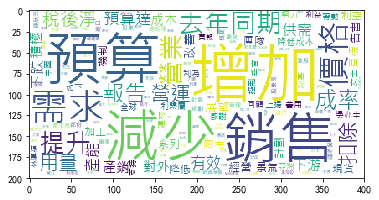

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [19]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('增加', 41),
 ('預算', 33),
 ('減少', 31),
 ('銷售', 30),
 ('需求', 21),
 ('價格', 16),
 ('去年同期', 15),
 ('提升', 15),
 ('營業', 15),
 ('成率', 11)]

In [20]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xfe02048>,
 <a list of 10 Text xticklabel objects>)

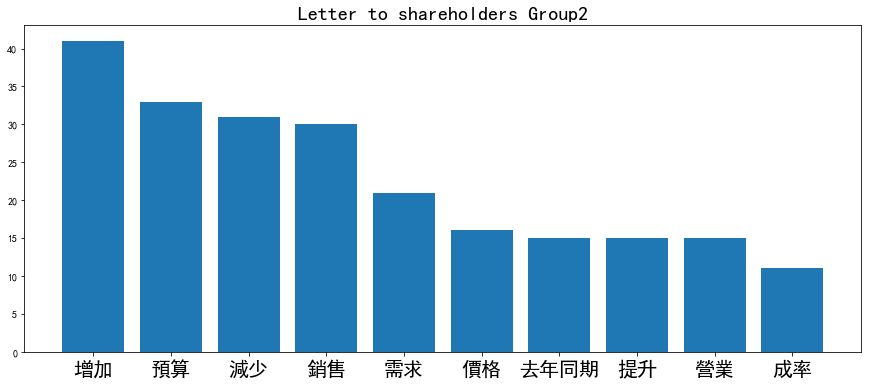

In [21]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("Letter to shareholders Group2",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [22]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.39167792,  0.58821077],
       [-0.33502331, -0.1949477 ],
       [-0.25072527, -0.48894055],
       [ 0.44625801,  0.09814418],
       [ 0.53116848, -0.0024667 ]])

No handles with labels found to put in legend.


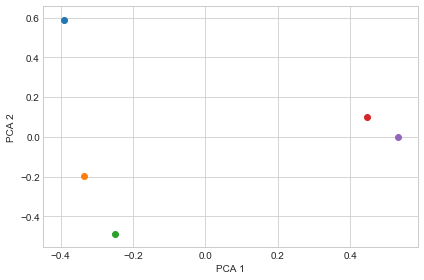

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

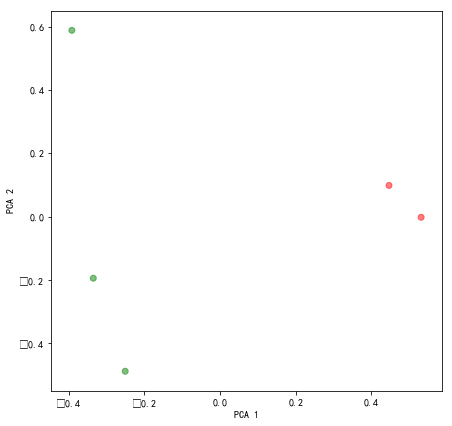

In [26]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()